<a href="https://colab.research.google.com/github/redjohnrosario-cpe/CPE-031-Visualization-and-Data-Analysis/blob/main/Creating_DataFrame_ROSARIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

data = {
    "Sale_ID": [101, 102, 103, 104, 105],
    "Date": ["2025-09-17"] * 5,   # yesterday’s date
    "Car_Brand": ["Toyota", "Honda", "Ford", "Nissan", "Hyundai"],
    "Car_Model": ["Corolla", "Civic", "Focus", "Altima", "Elantra"],
    "Year": [2021, 2020, 2019, 2022, 2021],
    "Price": [20000, 22000, 18000, 24000, 21000],
    "Buyer_Name": ["John Doe", "Jane Smith", "Carlos Reyes", "Anna Cruz", "Mark Lee"]
}
car_sales = pd.DataFrame(data, index=["Sale1","Sale2","Sale3","Sale4","Sale5"])

print(car_sales)

print(car_sales.loc["Sale1"])
file_path_csv = '/content/drive/MyDrive/yesterday_car_sales.csv'
car_sales.to_csv(file_path_csv, index=False)
file_path_xlsx = '/content/drive/MyDrive/yesterday_car_sales.xlsx'
car_sales.to_excel(file_path_xlsx, index=False)
print("Files saved to Google Drive:")
print(file_path_csv)
print(file_path_xlsx)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       Sale_ID        Date Car_Brand Car_Model  Year  Price    Buyer_Name
Sale1      101  2025-09-17    Toyota   Corolla  2021  20000      John Doe
Sale2      102  2025-09-17     Honda     Civic  2020  22000    Jane Smith
Sale3      103  2025-09-17      Ford     Focus  2019  18000  Carlos Reyes
Sale4      104  2025-09-17    Nissan    Altima  2022  24000     Anna Cruz
Sale5      105  2025-09-17   Hyundai   Elantra  2021  21000      Mark Lee
Sale_ID              101
Date          2025-09-17
Car_Brand         Toyota
Car_Model        Corolla
Year                2021
Price              20000
Buyer_Name      John Doe
Name: Sale1, dtype: object
Files saved to Google Drive:
/content/drive/MyDrive/yesterday_car_sales.csv
/content/drive/MyDrive/yesterday_car_sales.xlsx


In [ ]:
# Find Model Drives with only 512GB

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df_orig = pd.read_excel('/content/drive/MyDrive/CPE 031_ROSARIO/ComputerData.xlsx')
df_trimmed = df_orig[['Brand','Model','Storage (GB)']].copy()

df_filtered = df_trimmed[df_trimmed["Storage (GB)"] == 512].copy()
df_filtered

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Brand,Model,Storage (GB)
0,Dell,XPS 13,512
3,Lenovo,ThinkPad X1,512
4,Asus,ZenBook 14,512


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Sorted Sales Data:
   OrderDate   Region       Rep     Item  Units  Unit Cost   Total
11   7/12/21     East    Howard   Binder     29       1.99   57.71
28   4/27/22     East    Howard      Pen     96       4.99  479.04
0     1/6/21     East     Jones   Pencil     95       1.99  189.05
13   8/15/21     East     Jones   Pencil     35       4.99  174.65
5     4/1/21     East     Jones   Binder     60       4.99  299.40
9     6/8/21     East     Jones   Binder     60       8.99  539.40
24   2/18/22     East     Jones   Binder      4       4.99   19.96
17  10/22/21     East     Jones      Pen     64       8.99  575.36
32    7/4/22     East     Jones  Pen Set     62       4.99  309.38
12   7/29/21     East    Parent   Binder     81      19.99     NaN
18   11/8/21     East    Parent      Pen     15      19.99  299.85
21  12/29/21     East    Parent  Pen Set     74 

/tmp/ipython-input-4050012329.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_item = df.groupby("Item")["Total"].sum()


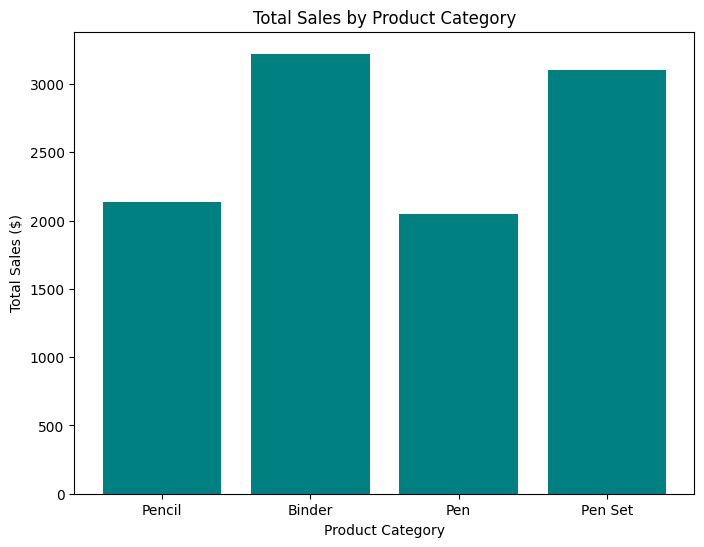

/tmp/ipython-input-4050012329.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_region = df.groupby("Region")["Total"].sum()


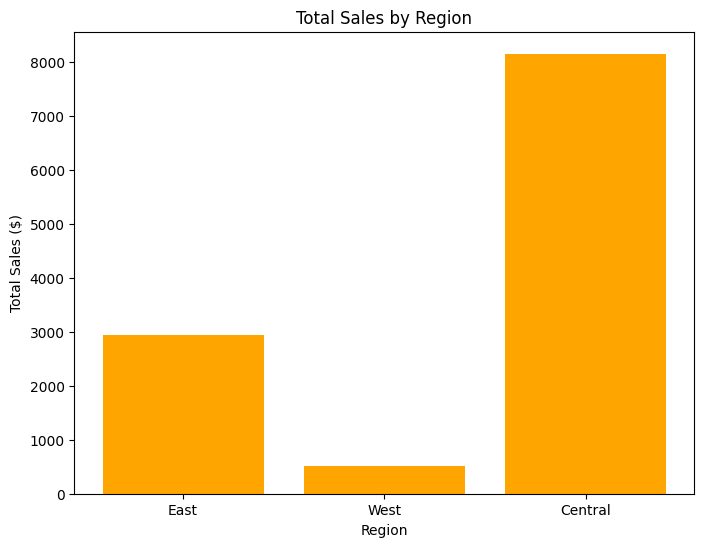

/tmp/ipython-input-4050012329.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rep = df.groupby("Rep")["Total"].sum()


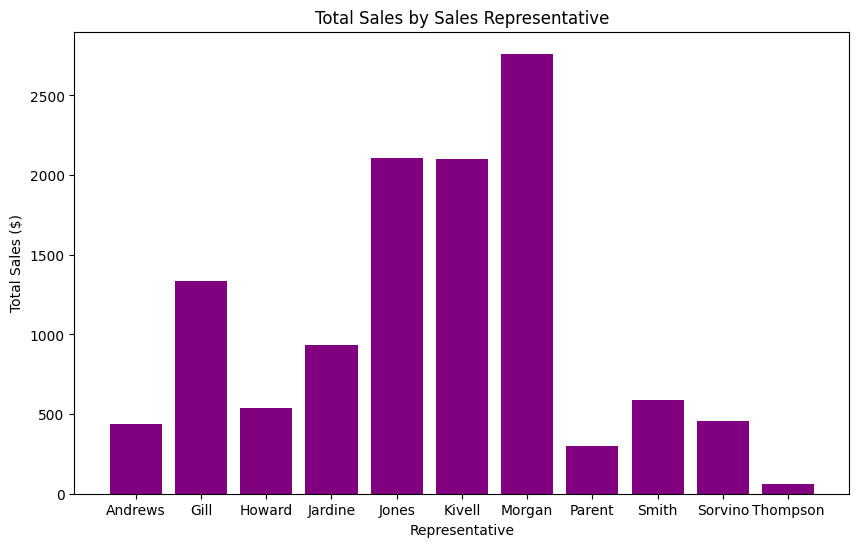

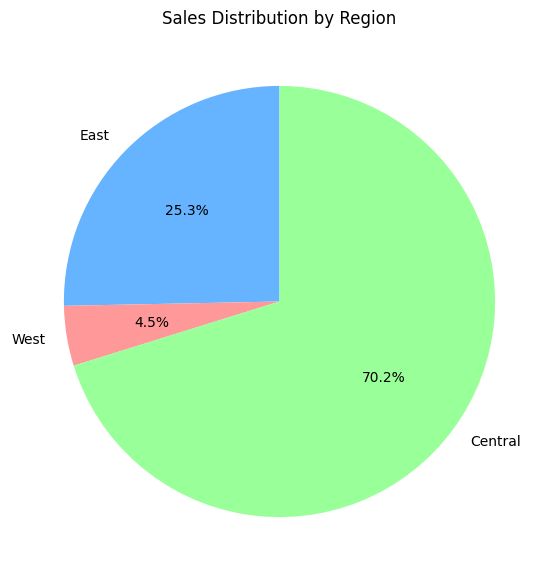

/tmp/ipython-input-4050012329.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rep_item = df.groupby(["Rep","Item"])["Total"].sum().unstack().fillna(0)


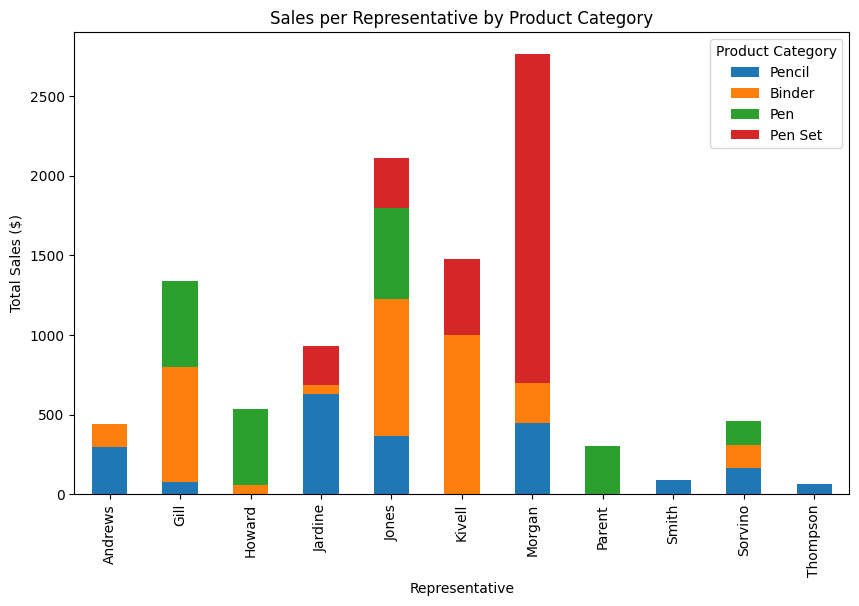

In [19]:
# Interpret data, appropriate title, appropriate chart
# Display the dataframe of these items with the same date of sell, per region, according to its representatives

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/CPE 031_ROSARIO/SampleData.csv')

region_sort_order = ["East","West","Central"]
df["Region"] = pd.Categorical(df["Region"], categories=region_sort_order, ordered=True)

df['Rep'] = pd.Categorical(df['Rep'])

item_category_order = ["Pencil","Binder","Pen","Pen Set"]
df['Item'] = pd.Categorical(df['Item'], categories=item_category_order, ordered=True)

df = df.sort_values(by=['Region','Rep','Item'])

df['Total'] = pd.to_numeric(df['Total'], errors="coerce")

print("Sorted Sales Data:")
print(df)

grouped_item = df.groupby("Item")["Total"].sum()
plt.figure(figsize=(8,6))
plt.bar(grouped_item.index, grouped_item.values, color="teal")
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales ($)")
plt.show()

grouped_region = df.groupby("Region")["Total"].sum()
plt.figure(figsize=(8,6))
plt.bar(grouped_region.index, grouped_region.values, color="orange")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.show()

grouped_rep = df.groupby("Rep")["Total"].sum()
plt.figure(figsize=(10,6))
plt.bar(grouped_rep.index, grouped_rep.values, color="purple")
plt.title("Total Sales by Sales Representative")
plt.xlabel("Representative")
plt.ylabel("Total Sales ($)")
plt.show()

plt.figure(figsize=(7,7))
plt.pie(grouped_region.values, labels=grouped_region.index, autopct='%1.1f%%', startangle=90, colors=["#66b3ff","#ff9999","#99ff99"])
plt.title("Sales Distribution by Region")
plt.show()

grouped_rep_item = df.groupby(["Rep","Item"])["Total"].sum().unstack().fillna(0)
grouped_rep_item.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Sales per Representative by Product Category")
plt.xlabel("Representative")
plt.ylabel("Total Sales ($)")
plt.legend(title="Product Category")
plt.show()

